# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import math

pd.set_option('max_rows', 100) #default value is 10
pd.set_option('max_columns', 100,) #default value is 10

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# read in the training dataset (csv)
url_train = 'https://github.com/Bornwise/load-shortfall-regression-predict-api/blob/master/df_train.csv?raw=true'
df_train = pd.read_csv(url_train, index_col=0)

# read in the test dataset (csv)
url_test = 'https://github.com/Bornwise/load-shortfall-regression-predict-api/blob/master/df_test.csv?raw=true'
df_test = pd.read_csv(url_test, index_col=0)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


The next few cells will focus on non-graphical EDA for both the Test and Train Datasets. We decided not to concact the Train and Test dataframes as it can potentially be a bad practice when dealing with more complex dataframes

In [3]:
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
df_test.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [5]:
df_train.shape

(8763, 48)

In [6]:
df_test.shape

(2920, 47)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 8763 to 11682
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  2920 non-null   object 
 1   Madrid_wind_speed     2920 non-null   float64
 2   Valencia_wind_deg     2920 non-null   object 
 3   Bilbao_rain_1h        2920 non-null   float64
 4   Valencia_wind_speed   2920 non-null   float64
 5   Seville_humidity      2920 non-null   float64
 6   Madrid_humidity       2920 non-null   float64
 7   Bilbao_clouds_all     2920 non-null   float64
 8   Bilbao_wind_speed     2920 non-null   float64
 9   Seville_clouds_all    2920 non-null   float64
 10  Bilbao_wind_deg       2920 non-null   float64
 11  Barcelona_wind_speed  2920 non-null   float64
 12  Barcelona_wind_deg    2920 non-null   float64
 13  Madrid_clouds_all     2920 non-null   float64
 14  Seville_wind_speed    2920 non-null   float64
 15  Barcelona_rain_1h

_We see that the train and test datasets both have 3 non-numeric features. This is an issue as most models struggle to read non-numeric info. This will be sorted out during the Data Engineering phase._

In [9]:
# Let's check for all the missing values in the training dataset
df_train.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [10]:
# Let's check for all the missing values in the test dataset
df_test.isnull().sum()

time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp              0
Valencia_humidity   

_In this case, fortunately the datasets are already quite clean in terms of Null Values. Again, this will be sorted out in the Data Egnineering phase._

In [11]:
# We take a quick look at the percentage of null values in the columns containing null values (both train and test datasets)

train = round((df_train.isnull().sum()/df_train.isnull().count())*100,2)
test = round((df_test.isnull().sum()/df_test.isnull().count())*100,2)

d = {'% missing training set': train, '% missing testing set': test}

pd.DataFrame(data=d).sort_values(by='% missing training set',ascending=False).head()

,% missing training set,% missing testing set
Valencia_pressure,23.6,15.55
Barcelona_pressure,0.0,0.00
Seville_temp_min,0.0,0.00
Madrid_weather_id,0.0,0.00
Madrid_wind_speed,0.0,0.00


_As these percentages are less than 50%, we'll avoid dropping the columns entirely and rather work on a astrategy to fill the missing values. (Data Engeineering Phase)_

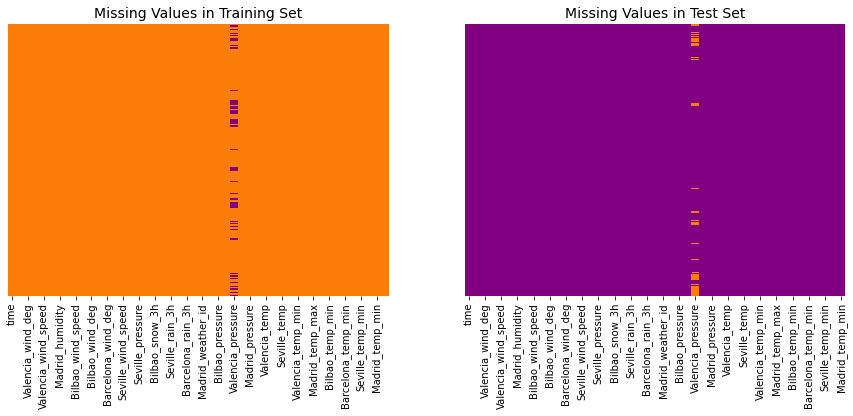

In [12]:
# Lets also look at the distribution of Null Values for both train and test datasets ...

fig,axis = plt.subplots(ncols=2, figsize=(15, 5))

#Training set
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap=['#fb7d07','purple'],ax=axis[0])
axis[0].set_title('Missing Values in Training Set',fontsize=14)

#Testing set
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap=['purple','#fb7d07'],ax=axis[1])
axis[1].set_title('Missing Values in Test Set',fontsize=14)

plt.show()

_The distribution of Nulls seems to be evenly spreadout accross both the train and test dataframes._

----------

We now check on the skewness and kurtosis of our datasets. Just a refresher for the interpretation for each of these:

SKEWNESS

* -0.5 < x < 0.5	Fairly Symmetrical
* -1 < x < -0.5	  Moderate Negative Skew_
* 0.5 < x < 1	Moderate Positive Skew
* x < -1	High Negative Skew
* x > 1	High Positve Skew


KURTOSIS

* Kurtosis is the measure of outliers present in the data.
* High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers.

In [13]:
# Skewness for train dataset

df_train.skew().sort_values(ascending=False).head(20) 

Valencia_snow_3h        63.298084
Barcelona_pressure      57.979664
Bilbao_snow_3h          26.177568
Seville_rain_3h         19.342574
Barcelona_rain_3h       12.696605
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Madrid_rain_1h           7.074308
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_clouds_all       1.814452
Bilbao_wind_speed        1.716914
Madrid_wind_speed        1.441144
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_wind_speed     1.057331
Bilbao_temp_max          0.393932
Madrid_temp              0.304123
Madrid_temp_max          0.298707
Bilbao_temp              0.293686
dtype: float64

In [14]:
# Skewness for test dataset

df_test.skew().sort_values(ascending=False).head(20)

Seville_rain_3h         54.037024
Barcelona_rain_3h       40.017330
Seville_rain_1h          6.269205
Barcelona_rain_1h        5.989675
Madrid_rain_1h           5.211963
Bilbao_rain_1h           3.404307
Seville_clouds_all       1.628723
Madrid_wind_speed        1.494269
Bilbao_wind_speed        1.381876
Seville_wind_speed       1.346297
Valencia_wind_speed      1.328872
Barcelona_wind_speed     1.080200
Madrid_clouds_all        0.925034
Seville_temp_max         0.473503
Seville_temp             0.447950
Seville_temp_min         0.423952
Madrid_temp              0.385689
Madrid_temp_max          0.380357
Madrid_temp_min          0.355444
Bilbao_wind_deg          0.322569
dtype: float64

In [15]:
# Kurtosis for train dataset

df_train.kurtosis().sort_values(ascending=False).head(20)

Valencia_snow_3h        4089.323165
Barcelona_pressure      3687.564230
Bilbao_snow_3h           806.128471
Seville_rain_3h          413.136592
Barcelona_rain_3h        187.800460
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Madrid_rain_1h            76.584491
Valencia_wind_speed       35.645426
Bilbao_rain_1h            32.904656
Seville_weather_id        10.710308
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_wind_speed          3.631565
Madrid_pressure            2.216199
Valencia_pressure          2.211823
Seville_clouds_all         2.155921
Madrid_wind_speed          2.036462
Bilbao_pressure            1.825323
Barcelona_wind_speed       1.493635
dtype: float64

In [16]:
# Kurtosis for test dataset

df_test.kurtosis().sort_values(ascending=False).head(20)

Seville_rain_3h         2920.000000
Barcelona_rain_3h       1642.238858
Barcelona_rain_1h         52.069367
Seville_rain_1h           48.243445
Madrid_rain_1h            41.250278
Bilbao_rain_1h            16.905396
Madrid_pressure           14.027856
Seville_weather_id         9.557456
Barcelona_weather_id       6.056749
Madrid_weather_id          5.349404
Valencia_pressure          4.966557
Madrid_wind_speed          2.567383
Seville_wind_speed         2.369604
Bilbao_wind_speed          2.306390
Valencia_wind_speed        2.100244
Bilbao_pressure            1.866927
Bilbao_weather_id          1.594178
Seville_clouds_all         1.417797
Barcelona_wind_speed       1.410571
Barcelona_pressure         1.175366
dtype: float64

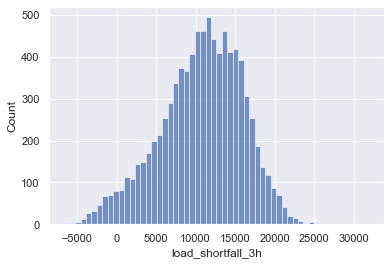

In [38]:
# Let's check the histogram of the target variable

sns.set(style="darkgrid")
sns.histplot(data=df_train, x="load_shortfall_3h", kde=False) # kde=True plots a 'line of best fit' along the bar peaks
plt.show()

<AxesSubplot:>

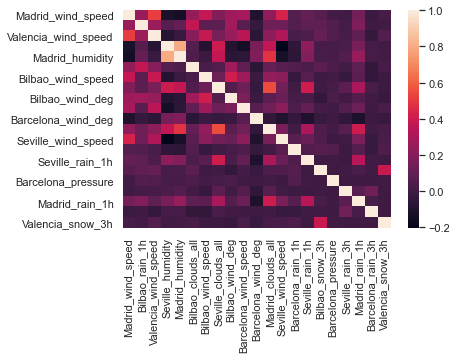

In [40]:
# Plot a correlation matrix for the first half of the features
sns.heatmap(df_train.iloc[:,:24].corr())

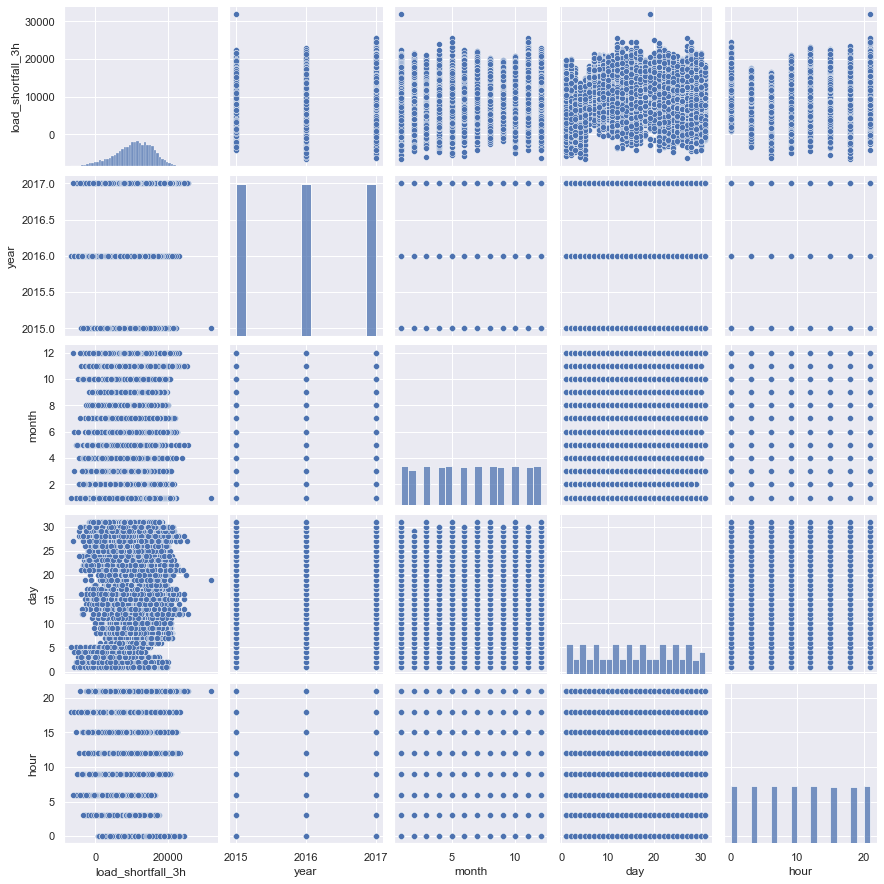

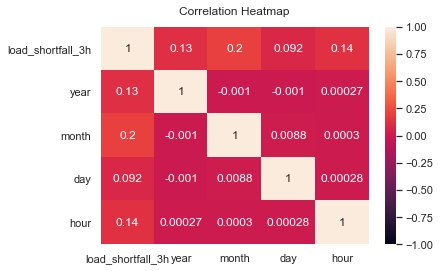

In [48]:
# Let's take a visual look at the DateTime features (created in the Data Engineering Phase) vs Load Shortfall

df_datetime = df_train_eng[['load_shortfall_3h', 'year', 'month', 'day', 'hour']]

# Plot a pairplot
sns.pairplot(df_datetime)
plt.show()

# Plot a correlation matrix
heatmap = sns.heatmap(df_datetime.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

_Before we start with any data engineering, let's first create a copy of the original dataframes so we have record of the original. You never know when you'll need to reference the original raw dataframe ..._

In [18]:
df_train_eng = df_train.copy() # Train copy to be engineered

df_test_eng = df_test.copy() # Train copy to be engineered

_We shall use the mode to fill the missing values for the pressure columns (both train and test datasets). We found the mode to be most appropriate as pressure values tend to repeat more often than not._

In [19]:
# Fill missing values for train dataset (with the mode)
df_train_eng['Valencia_pressure'] = df_train_eng['Valencia_pressure'].fillna(df_train_eng['Valencia_pressure'].mode()[0])

In [20]:
# Fill missing values for test dataset (with the mode)
df_test_eng['Valencia_pressure'] = df_test_eng['Valencia_pressure'].fillna(df_test_eng['Valencia_pressure'].mode()[0])

In [21]:
# Let's check again for missing values in our training dataset
df_train_eng.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

In [22]:
# Let's check again for missing values in our test dataset
df_test_eng.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

_Now we sort out the categorical features..._

In [23]:
# Callout all categorical features of the train dataset
df_train_eng[['time', 'Valencia_wind_deg', 'Seville_pressure']].head()

,time,Valencia_wind_deg,Seville_pressure
0,2015-01-01 03:00:00,level_5,sp25
1,2015-01-01 06:00:00,level_10,sp25
2,2015-01-01 09:00:00,level_9,sp25
3,2015-01-01 12:00:00,level_8,sp25
4,2015-01-01 15:00:00,level_7,sp25


In [24]:
# Callout all categorical features of the test dataset
df_test_eng[['time', 'Valencia_wind_deg', 'Seville_pressure']].head()

,time,Valencia_wind_deg,Seville_pressure
8763,2018-01-01 00:00:00,level_8,sp25
8764,2018-01-01 03:00:00,level_8,sp25
8765,2018-01-01 06:00:00,level_7,sp25
8766,2018-01-01 09:00:00,level_7,sp25
8767,2018-01-01 12:00:00,level_7,sp25


In [25]:
# Convert the datetime feature of the training dataset
df_train_eng['time'] = pd.to_datetime(df_train_eng['time'])

In [26]:
# Convert the datetime feature of the test dataset
df_test_eng['time'] = pd.to_datetime(df_test_eng['time'])

In [27]:
# Remove the string section of the column (Valencia_wind_deg feature - training dataset)
df_train_eng['Valencia_wind_deg'] = df_train_eng['Valencia_wind_deg'].str.extract('(\d+)')

# Convert to numeric (Valencia_wind_deg feature - training dataset)
df_train_eng['Valencia_wind_deg'] = pd.to_numeric(df_train_eng['Valencia_wind_deg'])

# Remove the string section of the column (Valencia_wind_deg feature - test dataset)
df_test_eng['Valencia_wind_deg'] = df_test_eng['Valencia_wind_deg'].str.extract('(\d+)')

# Convert to numeric (Valencia_wind_deg feature - test dataset)
df_test_eng['Valencia_wind_deg'] = pd.to_numeric(df_test_eng['Valencia_wind_deg'])

In [28]:
# Remove the string section of the column (Seville_pressure feature - training dataset)
df_train_eng['Seville_pressure'] = df_train_eng['Seville_pressure'].str.extract('(\d+)')

# Convert to numeric (Seville_pressure feature - training dataset)
df_train_eng['Seville_pressure'] = pd.to_numeric(df_train_eng['Seville_pressure'])

# Remove the string section of the column (Seville_pressure feature - test dataset)
df_test_eng['Seville_pressure'] = df_test_eng['Seville_pressure'].str.extract('(\d+)')

# Convert to numeric (Seville_pressure feature - test dataset)
df_test_eng['Seville_pressure'] = pd.to_numeric(df_test_eng['Seville_pressure'])

_Now we do a final check ensuring all our feature variables are indeed of numeric type ..._

In [29]:
# Callout all categorical features of the train dataset
df_train_eng[['time', 'Valencia_wind_deg', 'Seville_pressure']].head()

,time,Valencia_wind_deg,Seville_pressure
0,2015-01-01 03:00:00,5,25
1,2015-01-01 06:00:00,10,25
2,2015-01-01 09:00:00,9,25
3,2015-01-01 12:00:00,8,25
4,2015-01-01 15:00:00,7,25


In [30]:
# Callout all categorical features of the test dataset
df_test_eng[['time', 'Valencia_wind_deg', 'Seville_pressure']].head()

,time,Valencia_wind_deg,Seville_pressure
8763,2018-01-01 00:00:00,8,25
8764,2018-01-01 03:00:00,8,25
8765,2018-01-01 06:00:00,7,25
8766,2018-01-01 09:00:00,7,25
8767,2018-01-01 12:00:00,7,25


In [31]:
df_train_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   Madrid_wind_speed     8763 non-null   float64       
 2   Valencia_wind_deg     8763 non-null   int64         
 3   Bilbao_rain_1h        8763 non-null   float64       
 4   Valencia_wind_speed   8763 non-null   float64       
 5   Seville_humidity      8763 non-null   float64       
 6   Madrid_humidity       8763 non-null   float64       
 7   Bilbao_clouds_all     8763 non-null   float64       
 8   Bilbao_wind_speed     8763 non-null   float64       
 9   Seville_clouds_all    8763 non-null   float64       
 10  Bilbao_wind_deg       8763 non-null   float64       
 11  Barcelona_wind_speed  8763 non-null   float64       
 12  Barcelona_wind_deg    8763 non-null   float64       
 13  Madrid_clouds_all 

In [32]:
df_test_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 8763 to 11682
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  2920 non-null   datetime64[ns]
 1   Madrid_wind_speed     2920 non-null   float64       
 2   Valencia_wind_deg     2920 non-null   int64         
 3   Bilbao_rain_1h        2920 non-null   float64       
 4   Valencia_wind_speed   2920 non-null   float64       
 5   Seville_humidity      2920 non-null   float64       
 6   Madrid_humidity       2920 non-null   float64       
 7   Bilbao_clouds_all     2920 non-null   float64       
 8   Bilbao_wind_speed     2920 non-null   float64       
 9   Seville_clouds_all    2920 non-null   float64       
 10  Bilbao_wind_deg       2920 non-null   float64       
 11  Barcelona_wind_speed  2920 non-null   float64       
 12  Barcelona_wind_deg    2920 non-null   float64       
 13  Madrid_clouds_

In [33]:
# engineer existing features

In [51]:
# We will now seperate the DateTime feature into its various components and append it to our train and test dataframes.
# We will then subsuquently drop the DateTime feature as it will become redundant. 

# Feature generation for the Train set
df_train_eng['year'] = pd.DatetimeIndex(df_train_eng.time).year
df_train_eng['month'] = pd.DatetimeIndex(df_train_eng.time).month
df_train_eng['day'] = pd.DatetimeIndex(df_train_eng.time).day
df_train_eng['hour'] = pd.DatetimeIndex(df_train_eng.time).hour
df_train_eng = df_train_eng.drop(['time'], axis = 1)
df_train_eng.head()

AttributeError: 'DataFrame' object has no attribute 'time'

In [ ]:
df_train_eng

df_test_eng

In [50]:
# Feature generation for the Test set
df_test_eng['year'] = pd.DatetimeIndex(df_test_eng.time).year
df_test_eng['month'] = pd.DatetimeIndex(df_test_eng.time).month
df_test_eng['day'] = pd.DatetimeIndex(df_test_eng.time).day
df_test_eng['hour'] = pd.DatetimeIndex(df_test_eng.time).hour
df_test_eng = df_test_eng.drop(['time'], axis = 1)
df_test_eng

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month,day,hour
8763,5.000000,8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,1016.0,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,2018,1,1,0
8764,4.666667,8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,1016.0,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,2018,1,1,3
8765,2.333333,7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,1016.0,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,2018,1,1,6
8766,2.666667,7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,1016.0,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,2018,1,1,9
8767,4.000000,7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,1016.0,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,2018,1,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11678,0.333333,9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.000000,70.000000,6.333333,320.000000,0.0,2.000000,0.0,24,0.0,0,1029.666667,0.0,0.0,0.0,0,800.0,800.000000,1034.666667,800.000000,1016.0,280.816667,1031.666667,279.816667,279.323333,734.333333,280.210000,69.666667,278.816667,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,2018,12,31,9
11679,0.333333,8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.000000,36.666667,2.666667,293.333333,0.0,4.000000,0.0,24,0.0,0,1028.666667,0.0,0.0,0.0,0,800.0,800.000000,1034.333333,800.000000,1016.0,287.483333,1031.333333,290.816667,290.323333,747.666667,287.280000,32.000000,289.816667,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,2018,12,31,12
11680,1.000000,6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.0000

In [53]:
df_train_eng

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,day,hour
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.000000,223.333333,6.333333,42.666667,0.000000,3.333333,0.0,25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.000000,800.0,1035.000000,800.000000,1002.666667,274.254667,971.333333,269.888000,269.888000,800.000000,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.000000,221.000000,4.000000,139.000000,0.000000,3.333333,0.0,25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.000000,800.0,1035.666667,800.000000,1004.333333,274.945000,972.666667,271.728333,271.728333,800.000000,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.000000,214.333333,2.000000,326.000000,0.000000,2.666667,0.0,25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.000000,800.0,1036.000000,800.000000,1005.333333,278.792000,974.000000,278.008667,278.008667,800.000000,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.000000,199.666667,2.333333,273.000000,0.000000,4.000000,0.0,25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.000000,800.0,1036.000000,800.000000,1009.000000,285.394000,994.666667,284.899552,284.899552,800.000000,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,12
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.000000,185.000000,4.333333,260.000000,0.000000,3.000000,0.0,25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.000000,800.0,1035.333333,800.000000,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.000000,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1.000000,6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,226.666667,1.666667,83.666667,45.000000,1.000000,0.0,23,0.0,0.0,1021.000000,0.0,0.0,0.0,0.0,727.666667,801.0,1017.666667,769.333333,1018.000000,285.483333,1024.000000,282.483333,282.483333,802.333333,285.076667,71.333333,282.483333,282.150000,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333,2017,12,31,9
8759,5.000000,6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,220.000000,3.000000,213.333333,85.000000,1.666667,0.0,23,0.0,0.0,1019.000000,0.0,0.0,0.0,0.0,762.000000,801.0,1015.333333,803.000000,1021.000000,288.483333,1023.666667,291.816667,291.816667,801.333333,287.673333,40.333333,291.816667,287.816667,283.483333,287

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [55]:
# Its time to split the Training Data into its feature and target variables

X_train_raw = df_train_eng.drop(['load_shortfall_3h'], axis=1) 
y_train_raw = df_train_eng['load_shortfall_3h'] 

In [92]:
# For the model building process, we will start off by importing all necesarry libraries/modules from sklearn package
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score



In [66]:
# We'll then commence with our test/train split.
X_train, X_test, y_train, y_test = train_test_split(X_train_raw, y_train_raw, test_size=0.2, random_state=42)

In [67]:
rf = RandomForestRegressor(n_estimators=70, random_state=42)

In [69]:
# Now we fit the model to the data (in other words - "training the model")
rf_model = rf.fit(X_train, y_train)

In [70]:
# Let's test the performance of our model
from sklearn.metrics import mean_squared_error

In [71]:
# Get predictions
y_pred = rf.predict(X_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 3227.2037270897335


In [93]:
#compute the r2 score
r2_score(y_test, y_pred)

0.6301926008665499

In [79]:
daf=pd.DataFrame(y_pred, columns=['load_shortfall_3h'])
daf

,load_shortfall_3h
0,8362.247619
1,12901.880952
2,15388.657143
3,3024.133333
4,10147.871429
...,...
1748,5543.609524
1749,5517.057143
1750,12184.328571
1751,9810.142857


In [86]:
# Get predictions
y_pred_kaggle = rf.predict(df_test_eng)

# Compute RMSE
#print("RMSE:",np.sqrt(mean_squared_error(y_pred_kaggle)))

In [88]:
daf2=pd.DataFrame(y_pred_kaggle, columns=['load_shortfall_3h'])
daf2

,load_shortfall_3h
0,10126.542857
1,6352.080952
2,6506.876190
3,9589.690476
4,9677.595238
...,...
2915,14424.476190
2916,14038.409524
2917,13462.233333
2918,15245.304762


In [89]:
output = pd.DataFrame({"time":df_test['time']}).reset_index().drop('index', axis = 1)
submission = output.join(daf2)        
submission.to_csv("submission.csv", index=False)

In [90]:
submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10126.542857
1,2018-01-01 03:00:00,6352.080952
2,2018-01-01 06:00:00,6506.876190
3,2018-01-01 09:00:00,9589.690476
4,2018-01-01 12:00:00,9677.595238
...,...,...
2915,2018-12-31 09:00:00,14424.476190
2916,2018-12-31 12:00:00,14038.409524
2917,2018-12-31 15:00:00,13462.233333
2918,2018-12-31 18:00:00,15245.304762


In [85]:
len(y_pred_kaggle)

2920

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic